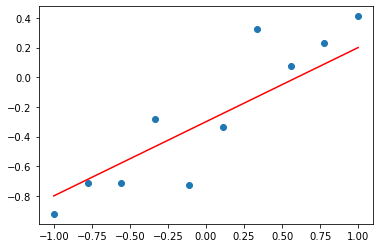

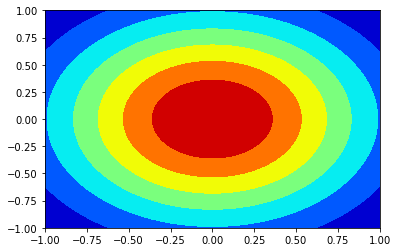

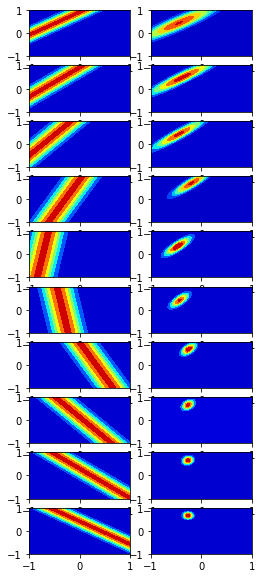

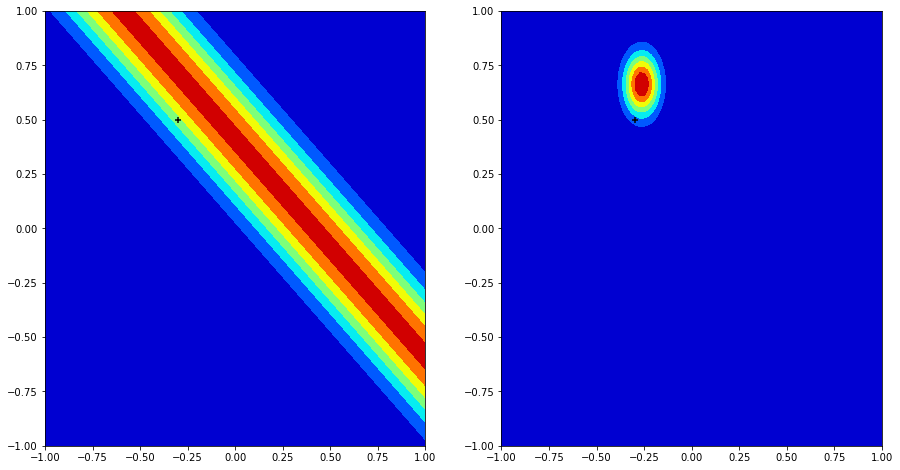

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import normal
from scipy.stats import norm
from math import sqrt
np.random.seed(40)
x = np.linspace(-1, 1, 10)
line = []
for i in x:
    i = -0.3 + 0.5 * i + normal(0, 0.2)
    line.append(i)
plt.scatter(x, line)
plt.plot(x, -0.3 + 0.5 * x, c="red")
plt.show()
def linear(x, w0, w1):
    return w0 + w1*x
    
def gaussian(y, x, w0, w1):
    sd = 0.2
    constant = sqrt(np.pi * 2) * sd
    return constant * np.exp(-0.5 * ((y - linear(x, w0, w1))/sd) ** 2)
w0, w1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
grid_0 = norm.pdf(w0, 0, sqrt(0.5))
grid_1 = norm.pdf(w1, 0, sqrt(0.5))
prior = grid_0 * grid_1
plt.contourf(w0, w1, prior, cmap="jet")
fig, axs = plt.subplots(10, 2, figsize=(4, 10))
count = 0
for i, j in zip(x, line):
    mle = gaussian(j, i, w0, w1)
    posterior = prior * mle
    prior = posterior
    axs[count, 0].contourf(w0, w1, mle, cmap="jet")
    axs[count, 1].contourf(w0, w1, posterior, cmap="jet")
    count += 1
    fig.savefig("figure-1")


fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].contourf(w0, w1, mle, cmap="jet")
axes[0].scatter(-0.3, 0.5, c="black", marker="+")
axes[1].contourf(w0, w1, posterior, cmap="jet")
axes[1].scatter(-0.3, 0.5, c="black", marker="+")
fig.savefig("figure-2")